In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
file_name = 'D:\\Springboard_Capstone2\\CapstoneDataset\\NewData\\YouTubeDataSet.csv'
df=pd.read_csv(file_name, encoding='utf-8')
df = df.dropna()
df.head()

,video_id,trending_date,title_description,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22.0,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22.0,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22.0,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062.0,7250.0,217.0,456.0,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22.0,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430.0,115426.0,1110.0,6541.0,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


### We shall plot a Bar Plot of each Numerical Data inorder to determine how much variance is within itself. 

### Lets first visualize the data with Bar Plot

In [3]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


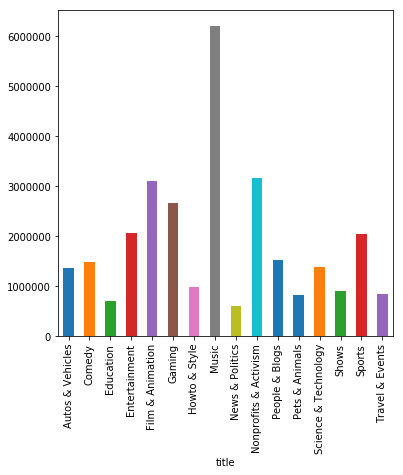

In [4]:
df = df.replace(np.nan,0)
df_views = df.groupby(['title'])['views'].mean()

df_views.plot.bar()

##### The number of Views based on category is highly variable as observed from the bar chart.

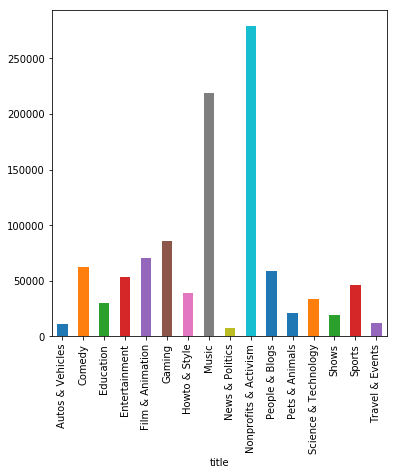

In [5]:
df_likes = df.groupby(['title'])['likes'].mean()

df_likes.plot.bar()

##### The number of Likes a Video recieves, based on category is highly variable as observed from the bar chart.

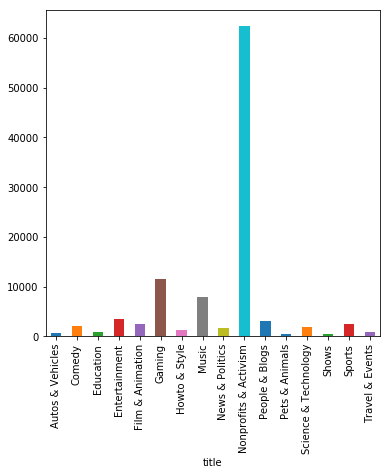

In [6]:
df_dislikes = df.groupby(['title'])['dislikes'].mean()

df_dislikes.plot.bar()

##### The number of Dislikes a Video recieves, based on category is highly variable as observed from the bar chart.

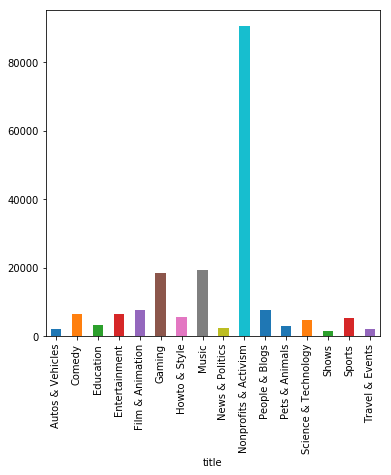

In [7]:
df_comment_count = df.groupby(['title'])['comment_count'].mean()

df_comment_count.plot.bar()

##### The number of Comments a Video recieves, based on category is highly variable as observed from the bar chart.

### Overall visually we have observed that there is high variability within the Numerical Features of the dataset. 

## Running Annova One way:

##### Null Hypothesis (H0): The mean of all the groups are almost the same.

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [9]:
from scipy import stats
f_value, p_value = stats.f_oneway(df['views'], df['likes'], df['dislikes'],df['comment_count'])

In [10]:
f_value, p_value

(3996.3993559589894, 0.0)

#### Since the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.

## TUKEY HSD TEST

In [4]:
Statistics = df[['views','likes', 'dislikes','comment_count']]

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['views'], df['title']))

                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                     
        group1                group2           meandiff       lower         upper     reject
--------------------------------------------------------------------------------------------
   Autos & Vehicles           Comedy         110649.9406   -1228391.869  1449691.7502 False 
   Autos & Vehicles         Education        -654491.1955  -2064311.445   755329.054  False 
   Autos & Vehicles       Entertainment      699841.9038   -595221.5191  1994905.3267 False 
   Autos & Vehicles      Film & Animation    1738953.4462  369132.3863   3108774.506   True 
   Autos & Vehicles           Gaming         1301061.9539  -244448.1651  2846572.0729 False 
   Autos & Vehicles       Howto & Style      -386700.9954 -1714472.7351  941070.7443  False 
   Autos & Vehicles           Music          4839903.8557  3532240.8729  6147566.8385  True 
   Autos & Vehicles      News & Politics     -772421.6453 -2139505.481

In [6]:
print(pairwise_tukeyhsd(df['likes'], df['title']))

                    Multiple Comparison of Means - Tukey HSD,FWER=0.05                   
        group1                group2          meandiff      lower        upper     reject
-----------------------------------------------------------------------------------------
   Autos & Vehicles           Comedy         51528.2355   10661.813    92394.6581   True 
   Autos & Vehicles         Education        18798.1632  -24228.3574   61824.6839  False 
   Autos & Vehicles       Entertainment      41879.398    2355.1586    81403.6375   True 
   Autos & Vehicles      Film & Animation    59731.3352   17925.556   101537.1144   True 
   Autos & Vehicles           Gaming         74945.2841   27777.6235  122112.9447   True 
   Autos & Vehicles       Howto & Style      28207.1475  -12315.3221   68729.6171  False 
   Autos & Vehicles           Music         207814.1485  167905.3811  247722.9158   True 
   Autos & Vehicles      News & Politics     -3821.5556   -45543.797   37900.6859  False 
   Autos &

In [7]:
print(pairwise_tukeyhsd(df['dislikes'], df['title']))

                  Multiple Comparison of Means - Tukey HSD,FWER=0.05                  
        group1                group2          meandiff     lower       upper    reject
--------------------------------------------------------------------------------------
   Autos & Vehicles           Comedy         1458.1154   -2802.137   5718.3677  False 
   Autos & Vehicles         Education         182.4427   -4302.996   4667.8815  False 
   Autos & Vehicles       Entertainment      2790.8224   -1329.5097  6911.1545  False 
   Autos & Vehicles      Film & Animation    1954.9125   -2403.2661  6313.0911  False 
   Autos & Vehicles           Gaming         10918.1177  6000.9725   15835.263   True 
   Autos & Vehicles       Howto & Style       683.3629   -3541.0329  4907.7587  False 
   Autos & Vehicles           Music          7289.1573   3128.7389   11449.5758  True 
   Autos & Vehicles      News & Politics      996.843    -3352.6269  5346.3129  False 
   Autos & Vehicles   Nonprofits & Activism

In [8]:
print(pairwise_tukeyhsd(df['comment_count'], df['title']))

                   Multiple Comparison of Means - Tukey HSD,FWER=0.05                  
        group1                group2          meandiff     lower        upper    reject
---------------------------------------------------------------------------------------
   Autos & Vehicles           Comedy         4452.1161   -1816.6771   10720.9093 False 
   Autos & Vehicles         Education        1244.5734   -5355.5727   7844.7195  False 
   Autos & Vehicles       Entertainment       4569.714   -1493.1921   10632.6201 False 
   Autos & Vehicles      Film & Animation    5573.7604   -839.1275    11986.6482 False 
   Autos & Vehicles           Gaming         16408.0324  9172.6472    23643.4176  True 
   Autos & Vehicles       Howto & Style      3530.8105   -2685.2213   9746.8423  False 
   Autos & Vehicles           Music          17303.0271  11181.1354   23424.9187  True 
   Autos & Vehicles      News & Politics      349.8296   -6050.2438    6749.903  False 
   Autos & Vehicles   Nonprofits

## Checking the correlation of the numerical features with each other:

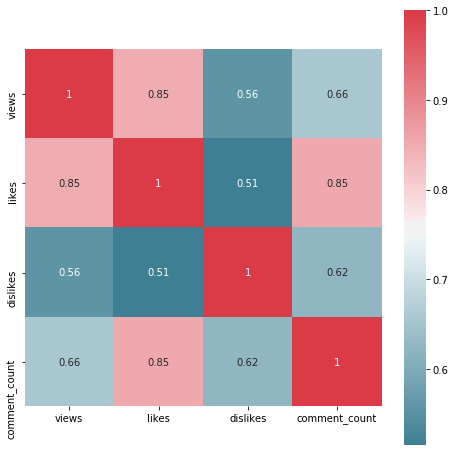

In [14]:
import seaborn as sns

columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

##### The Numerical Features such as Views, Comment Count, Likes and Dislikes are highly correlated. Hence in my opinion I shall use only one Numerical Variable in our Training Data.